<a href="https://colab.research.google.com/github/evandrofr/visao_projeto2/blob/main/projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJETO 2

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Cubo 1


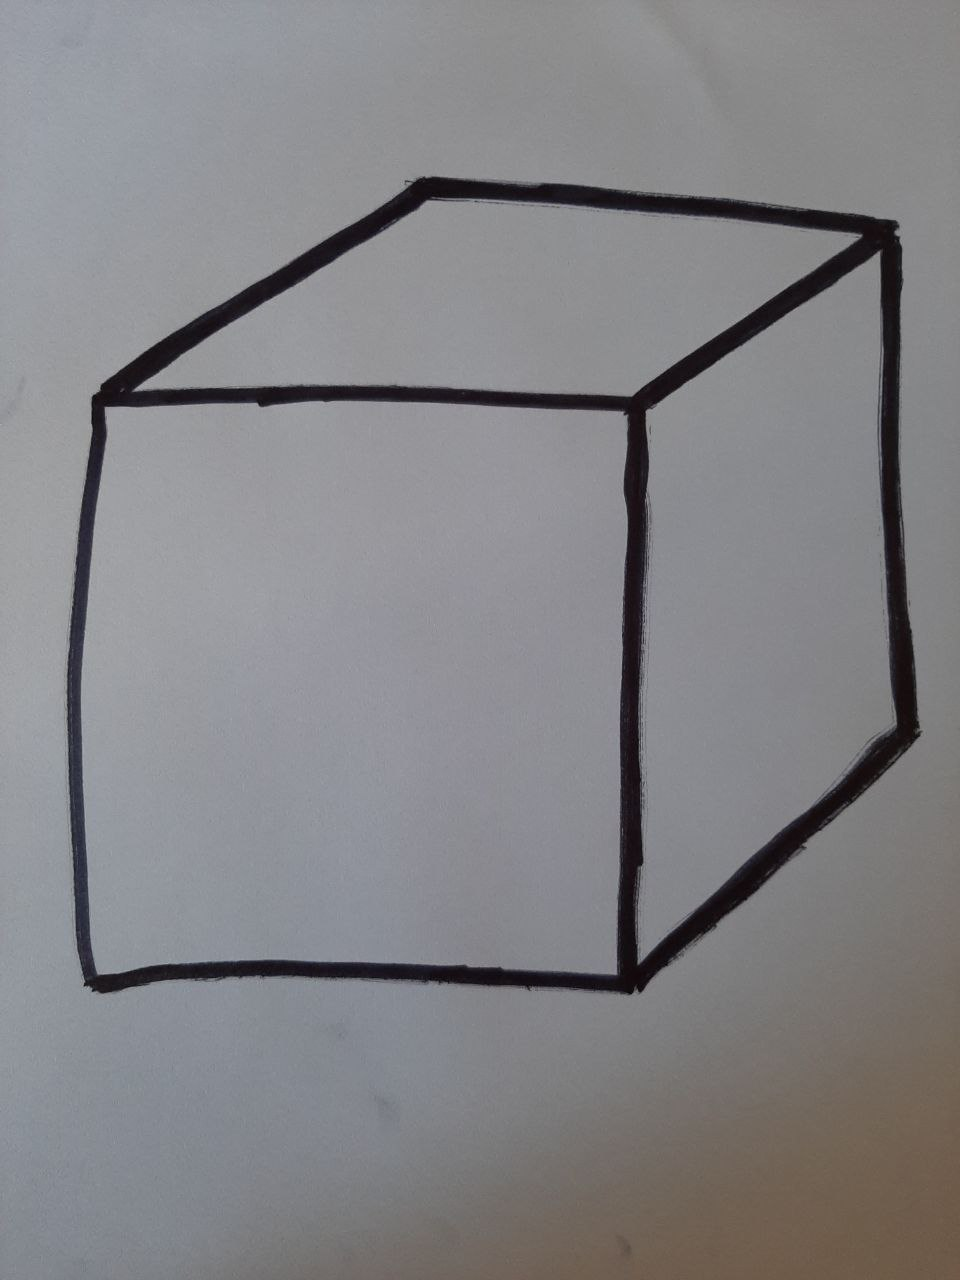

Cubo 2


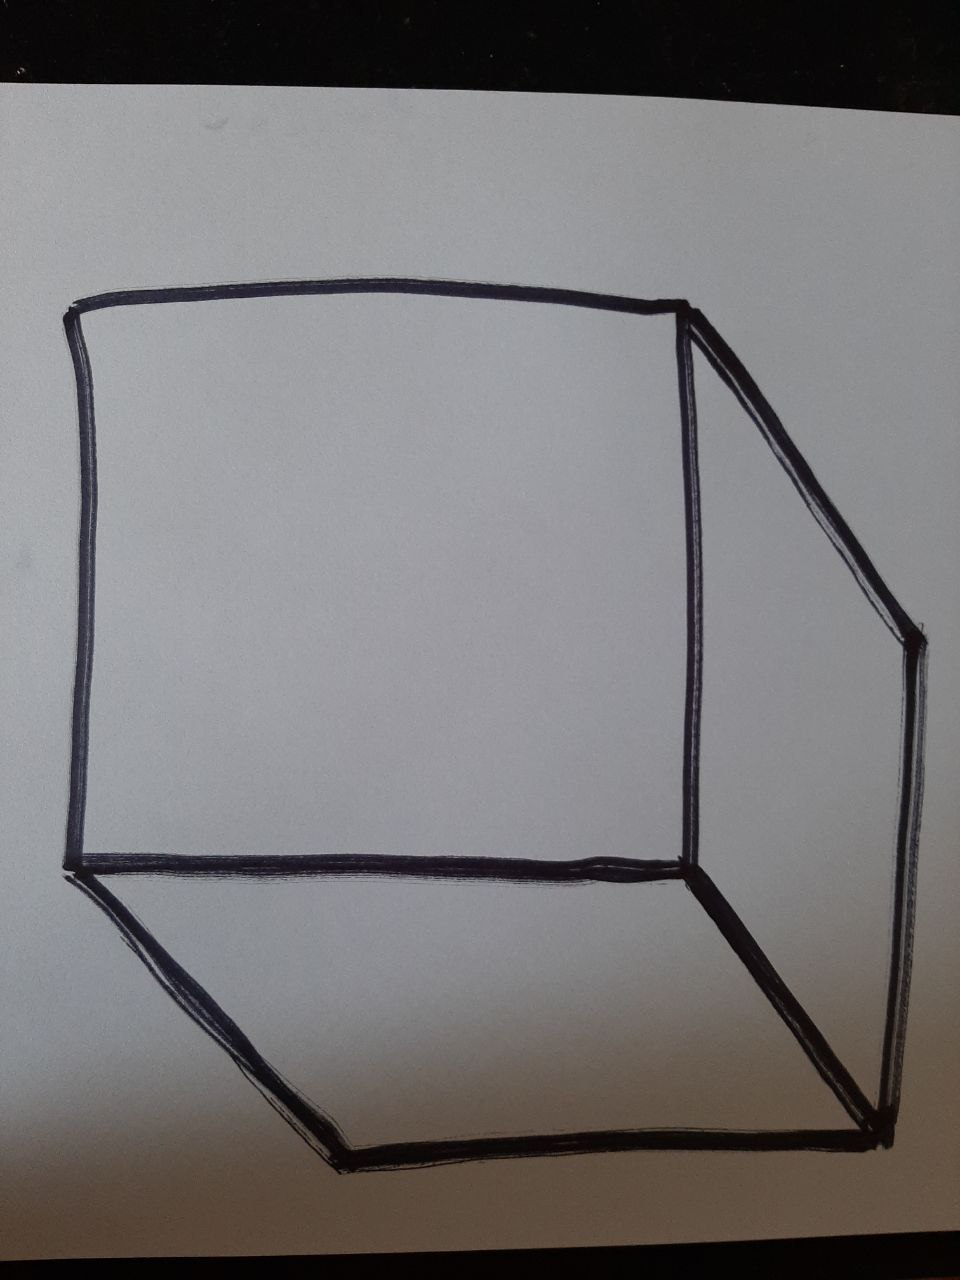

In [5]:
img1 = cv.imread('cubo_06.jpeg')
print("Cubo 1")
cv2_imshow(img1)
img2 = cv.imread('cubo_05.jpeg')
print("Cubo 2")
cv2_imshow(img2)

Todas as ocorrências:


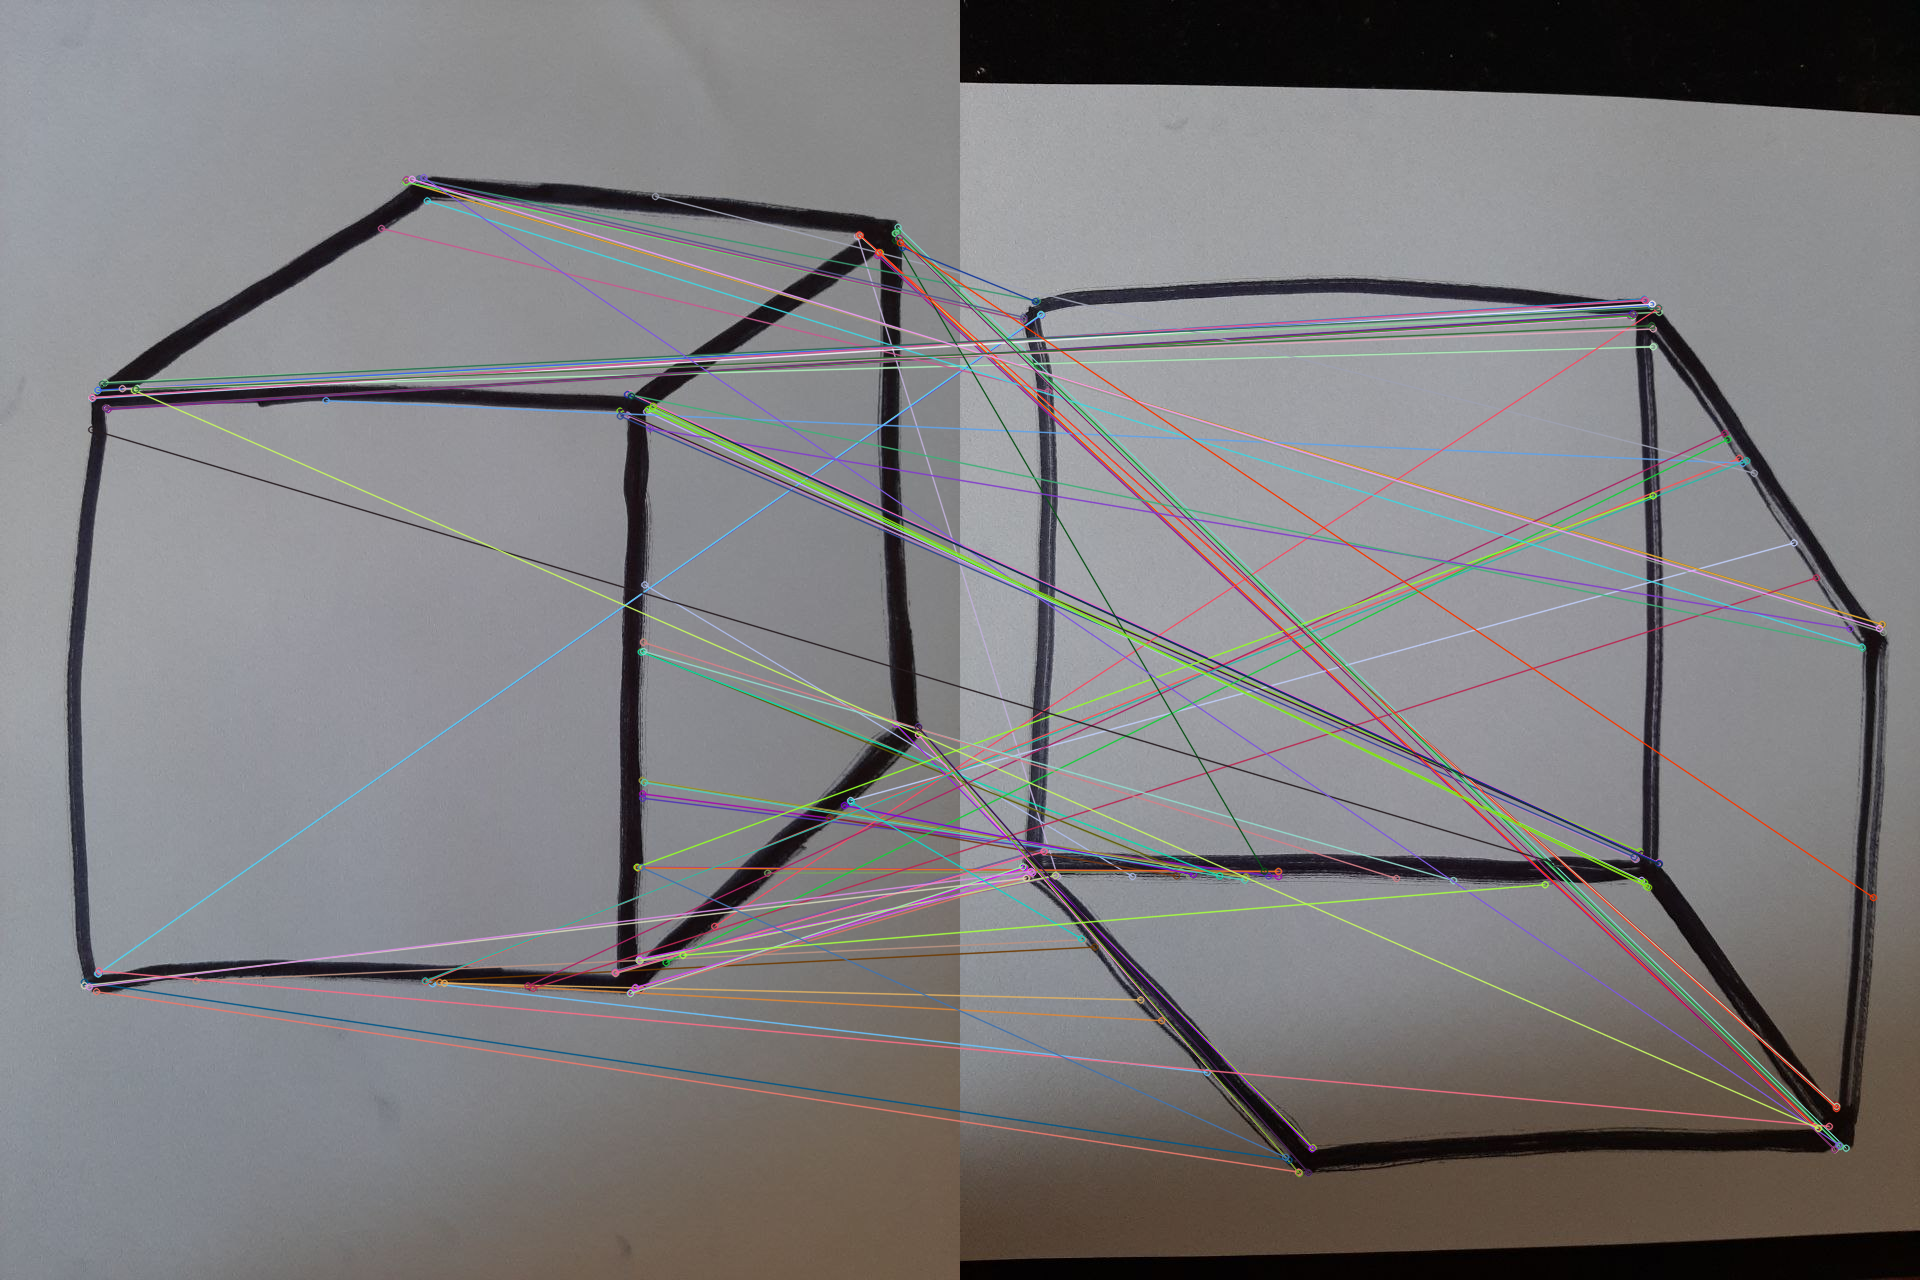

In [6]:
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches,None, flags=2)
print("Todas as ocorrências:")
cv2_imshow(img3)

Somente as doze primeiras correspondências:
(643.0, 651.0) <--> (123.0, 940.0)
(423.0, 177.0) <--> (233.0, 874.0)
(918.0, 727.0) <--> (891.0, 627.0)
(920.0, 729.0) <--> (919.0, 628.0)
(405.0, 181.0) <--> (75.0, 307.0)
(630.0, 993.0) <--> (874.0, 1149.0)
(921.0, 731.0) <--> (810.0, 504.0)
(919.0, 732.0) <--> (879.0, 1145.0)
(411.0, 179.0) <--> (692.0, 342.0)
(640.0, 991.0) <--> (858.0, 1128.0)
(851.0, 801.0) <--> (922.0, 624.0)
(448.0, 982.0) <--> (923.0, 632.0)


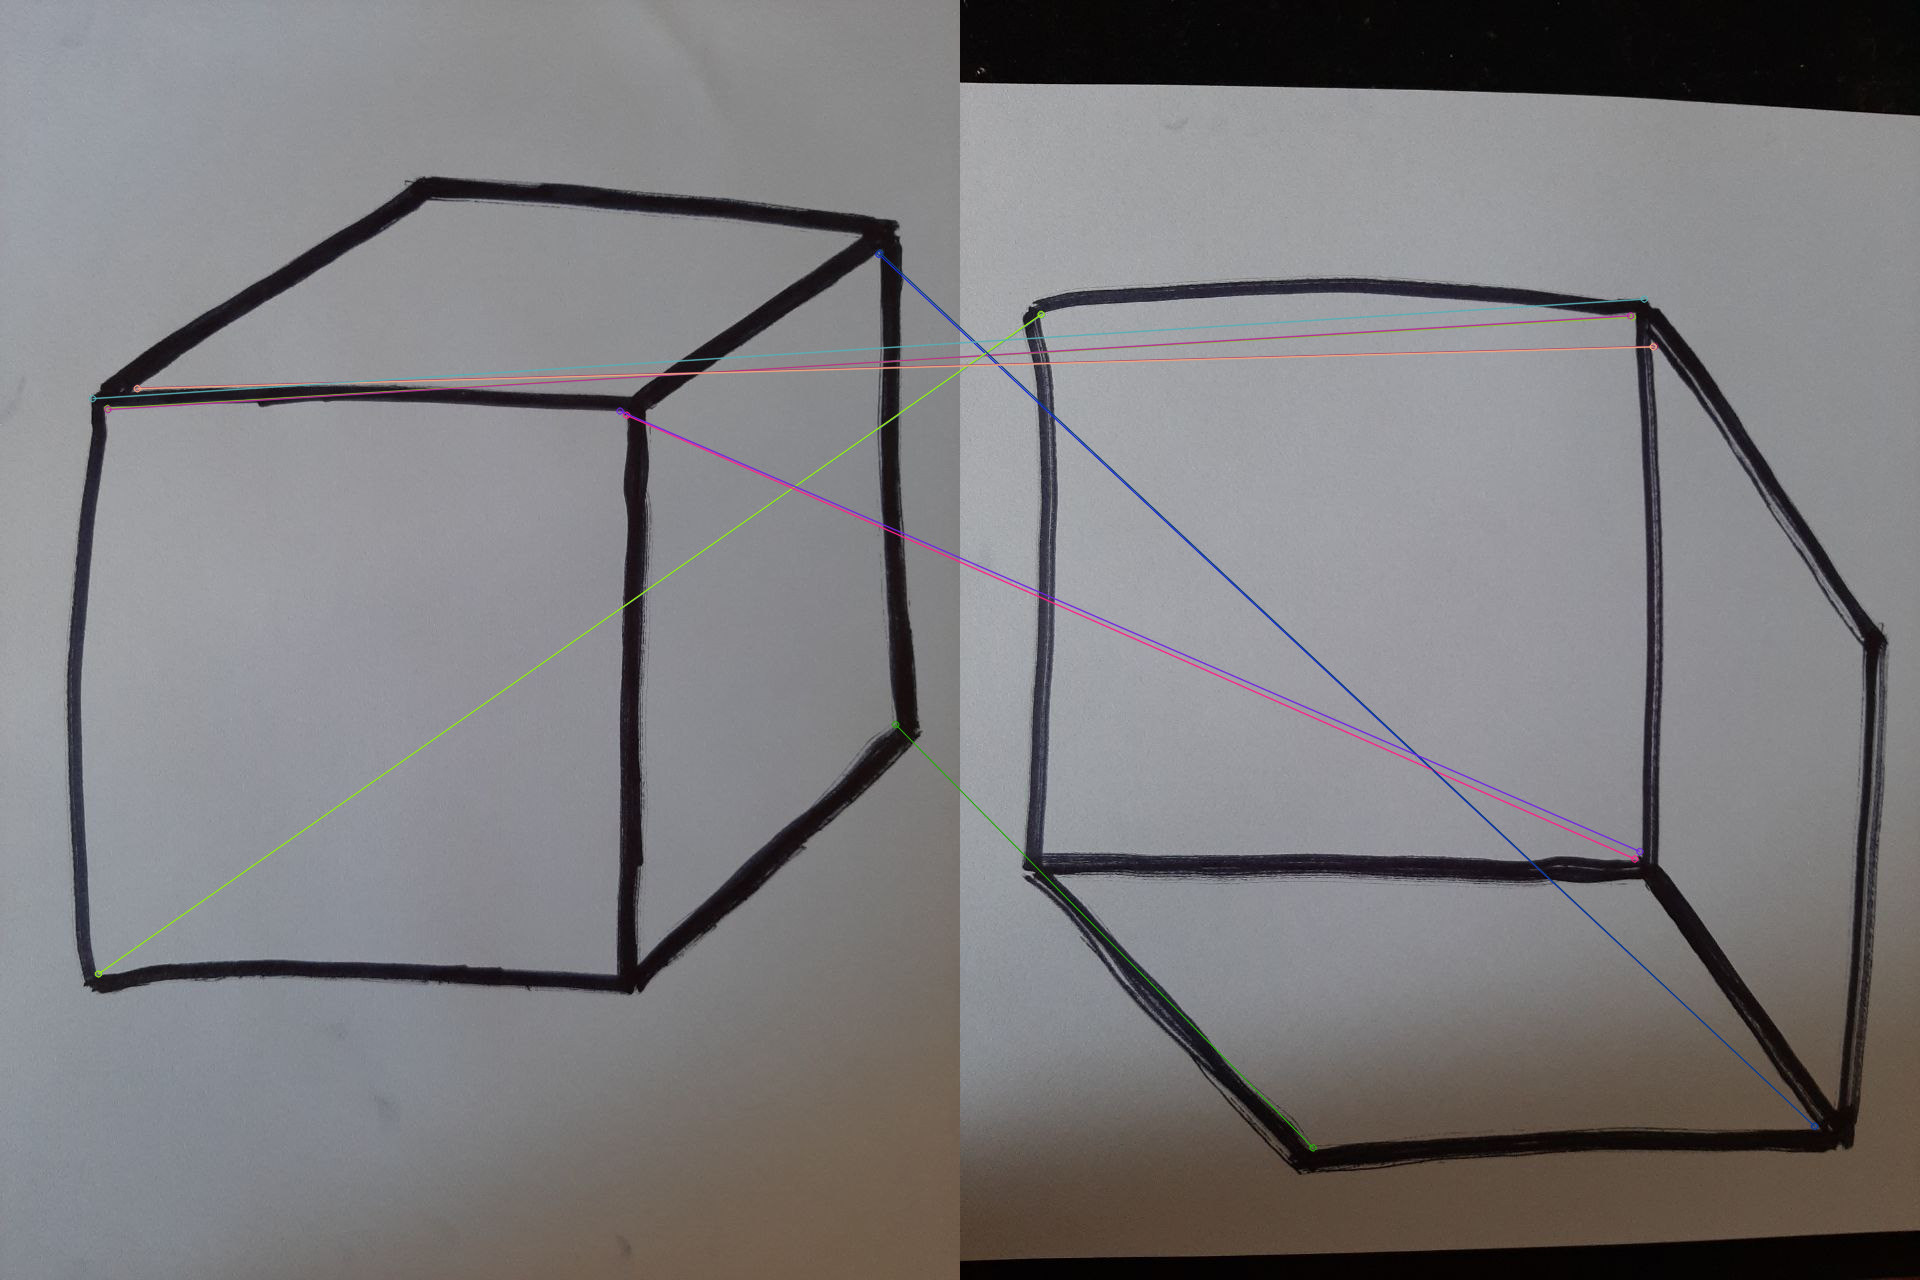

In [7]:
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:12],None, flags=2)
print("Somente as doze primeiras correspondências:")
for i in range(12):
  print(kp1[i].pt,"<-->",kp2[i].pt)
cv2_imshow(img3)

### Percebesse que os pontos encontrados sempre são próximos aos vertices

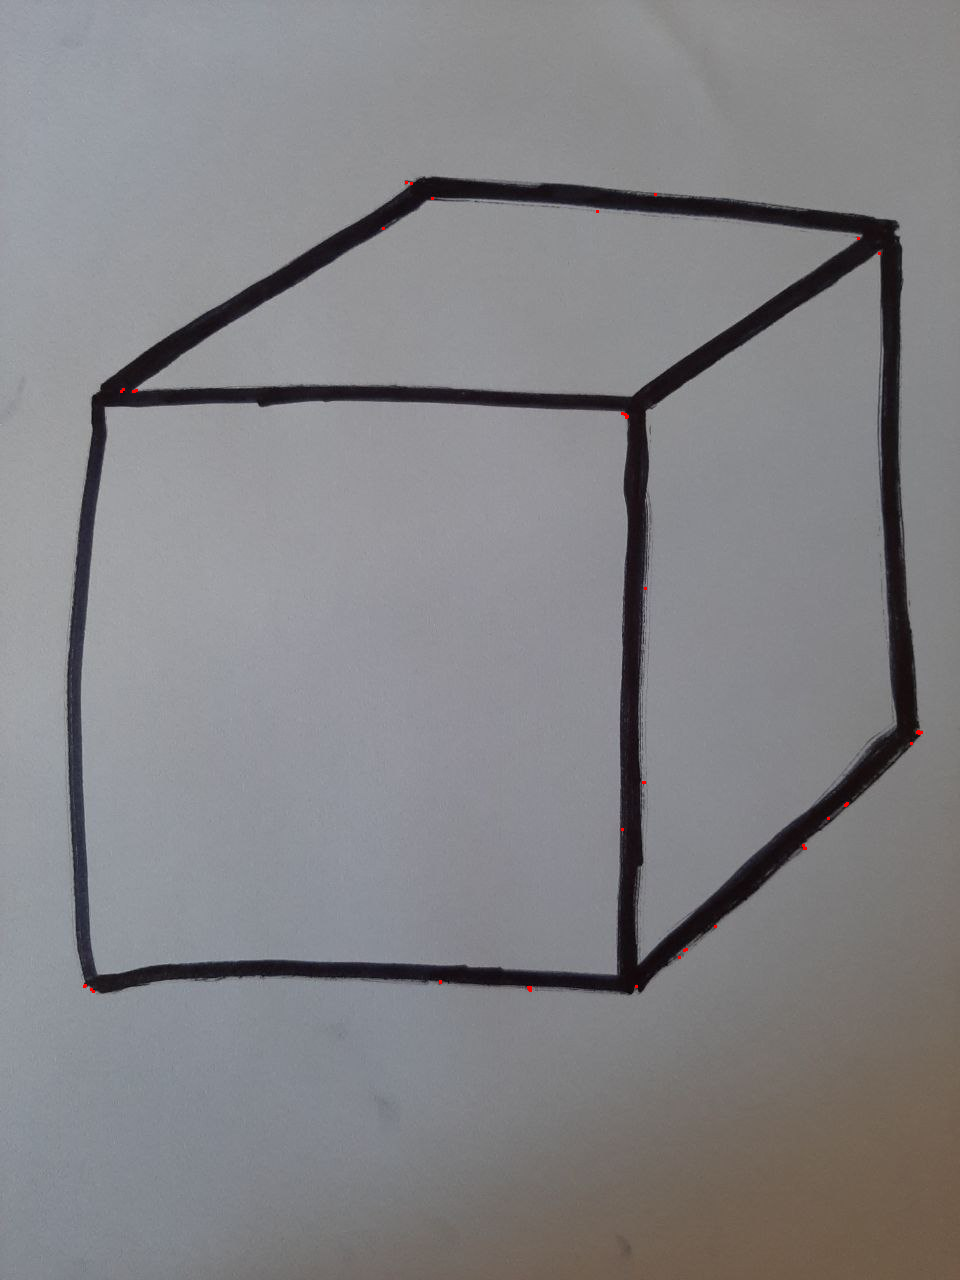

In [60]:
img = cv.imread('cubo_06.jpeg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.2) #Documentação: https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345
dst = cv.dilate(dst,None)
# cv2_imshow(dst)
# print("")
img_copy = img.copy()
img_copy[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img_copy)

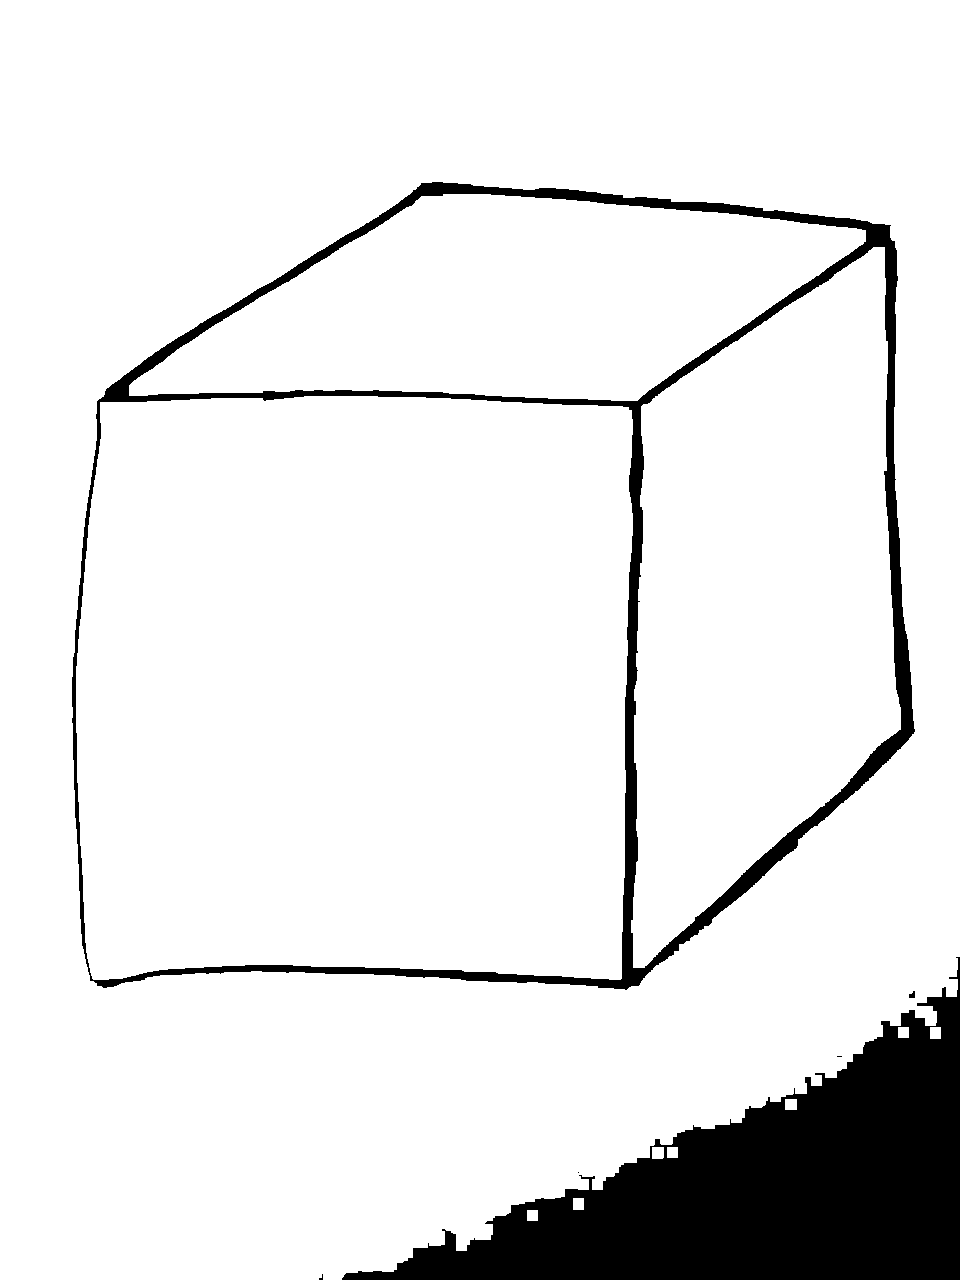

In [61]:
image = cv.imread('cubo_06.jpeg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# cv2_imshow(gray)
thresh = np.median(gray) - 30
im_bw = cv.threshold(gray, thresh, 255, cv.THRESH_BINARY)[1]
im_bw = cv.bitwise_not(im_bw)
# cv2_imshow(im_bw)

kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(im_bw,kernel,iterations = 5)
erosion = cv.bitwise_not(erosion)
cv2_imshow(erosion)

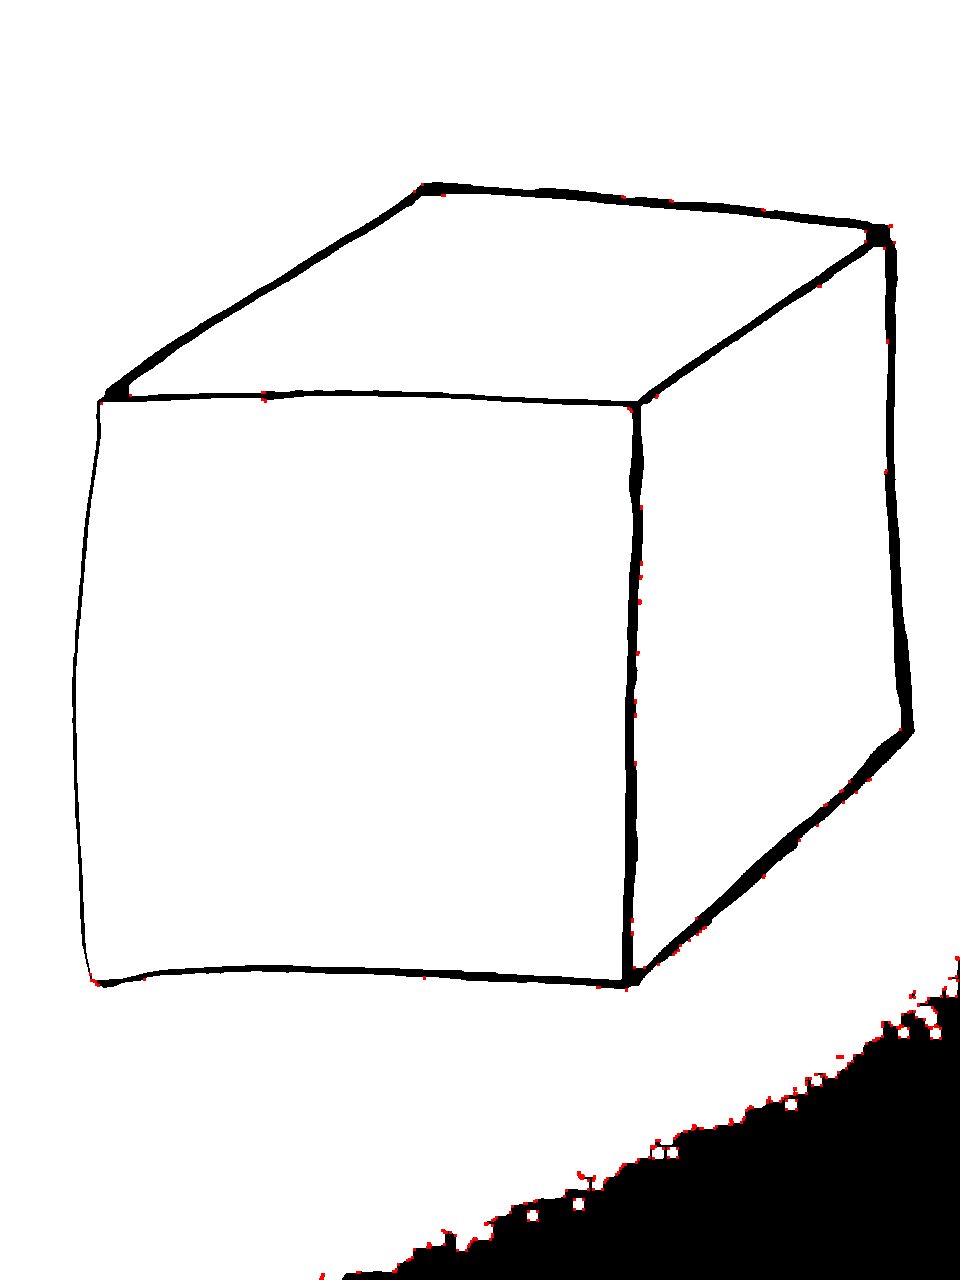

In [63]:
image_eroded = cv.cvtColor(erosion, cv.COLOR_GRAY2BGR)
erosion = np.float32(erosion)
dst = cv.cornerHarris(erosion,2,3,0.1) #Documentação: https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345
dst = cv.dilate(dst,None)
# cv2_imshow(dst)
# print("")
image_copy = image_eroded.copy()
image_copy[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(image_copy)

In [56]:
!pip install imutils

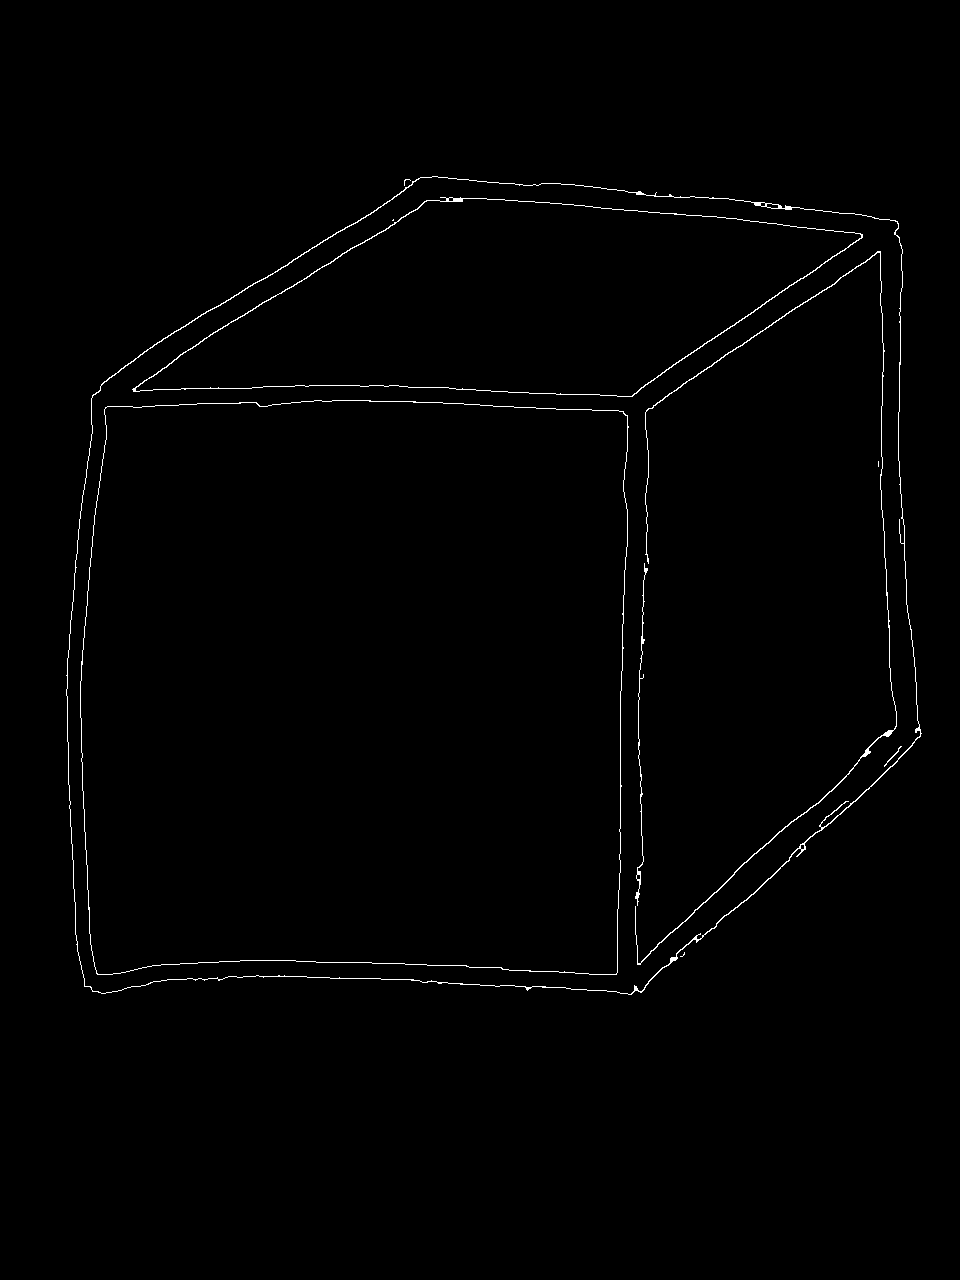

In [70]:
import imutils
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
#carregamos a imagem, convertemos para níveis de cinza e a borramos levemente
# erosion_blur = cv.GaussianBlur(image_eroded, (7, 7), 0)
# erosion_blur = cv.cvtColor(erosion_blur, cv.COLOR_BGR2GRAY)

image = cv.imread('cubo_06.jpeg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 0)

#calculamos as arestas e realizamos uma dilatação + erosão para fechar
#eventuais gaps entre as arestas dos objetos
edged = cv.Canny(gray, 50, 100)
edged = cv.dilate(edged, None, iterations=1)
edged = cv.erode(edged, None, iterations=1)
cv2_imshow(edged)

cnts = cv.findContours(edged.copy(),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
(cnts, _) = contours.sort_contours(cnts)

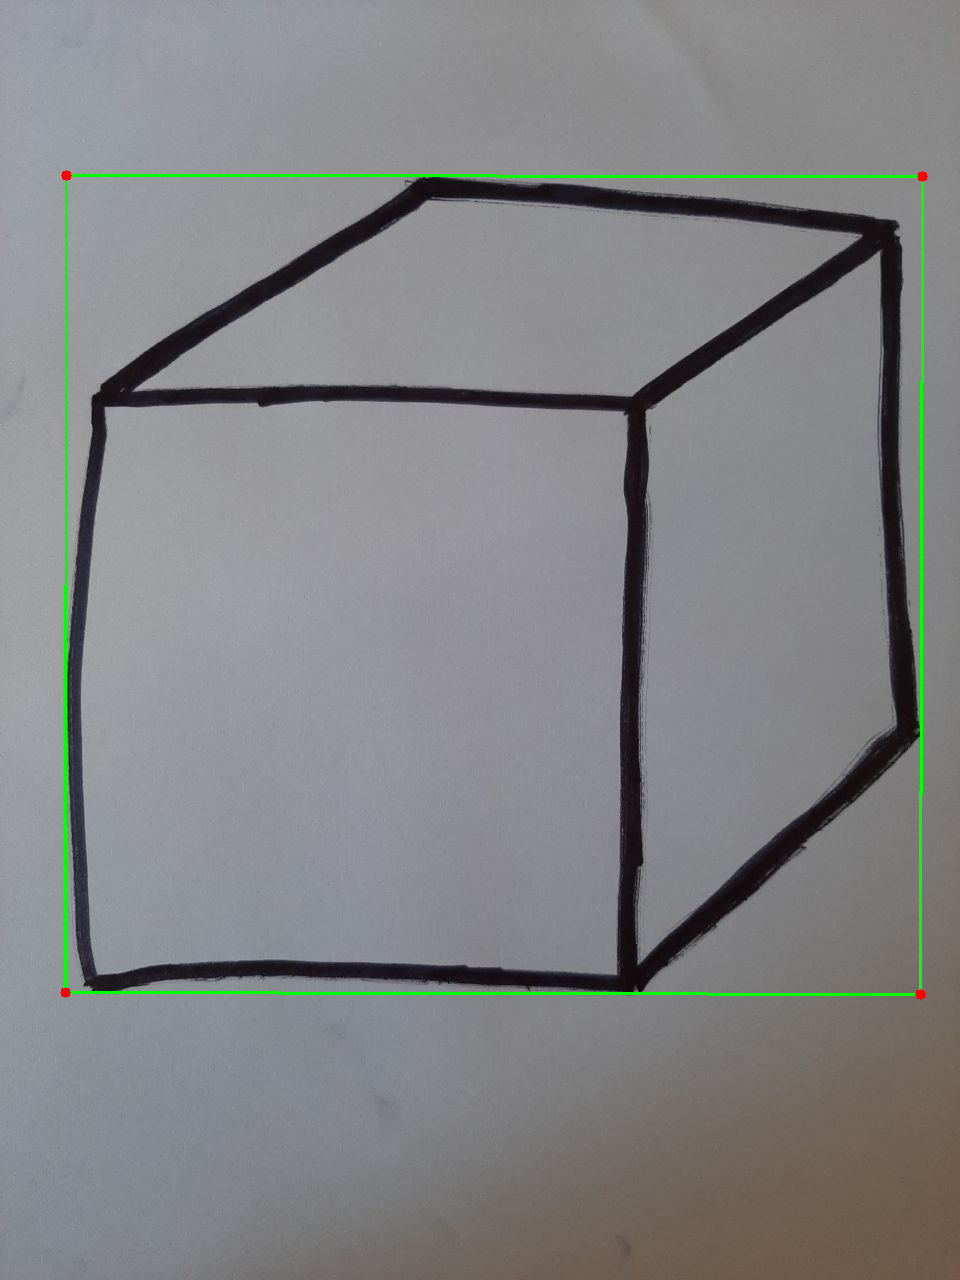

In [72]:
orig = image.copy()

#Percorre todos os contornos
for c in cnts:
  # se o contorno não é suficientemente grande, ignorá-lo
  if cv.contourArea(c) < 10:
    continue
  # calcula a bounding box rotacionada do contorno
  box = cv.minAreaRect(c)
  box = cv.boxPoints(box) 
  box = np.array(box, dtype="int")
  #ordena os pontos do contorno de tal modo que eles
  #apareçam na seguinte ordem: topo-esquerda, topo-direita,
  #base-direita e base-esquerda
  box = perspective.order_points(box)
  cv.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
  for (x, y) in box:
    cv.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
cv2_imshow(orig)

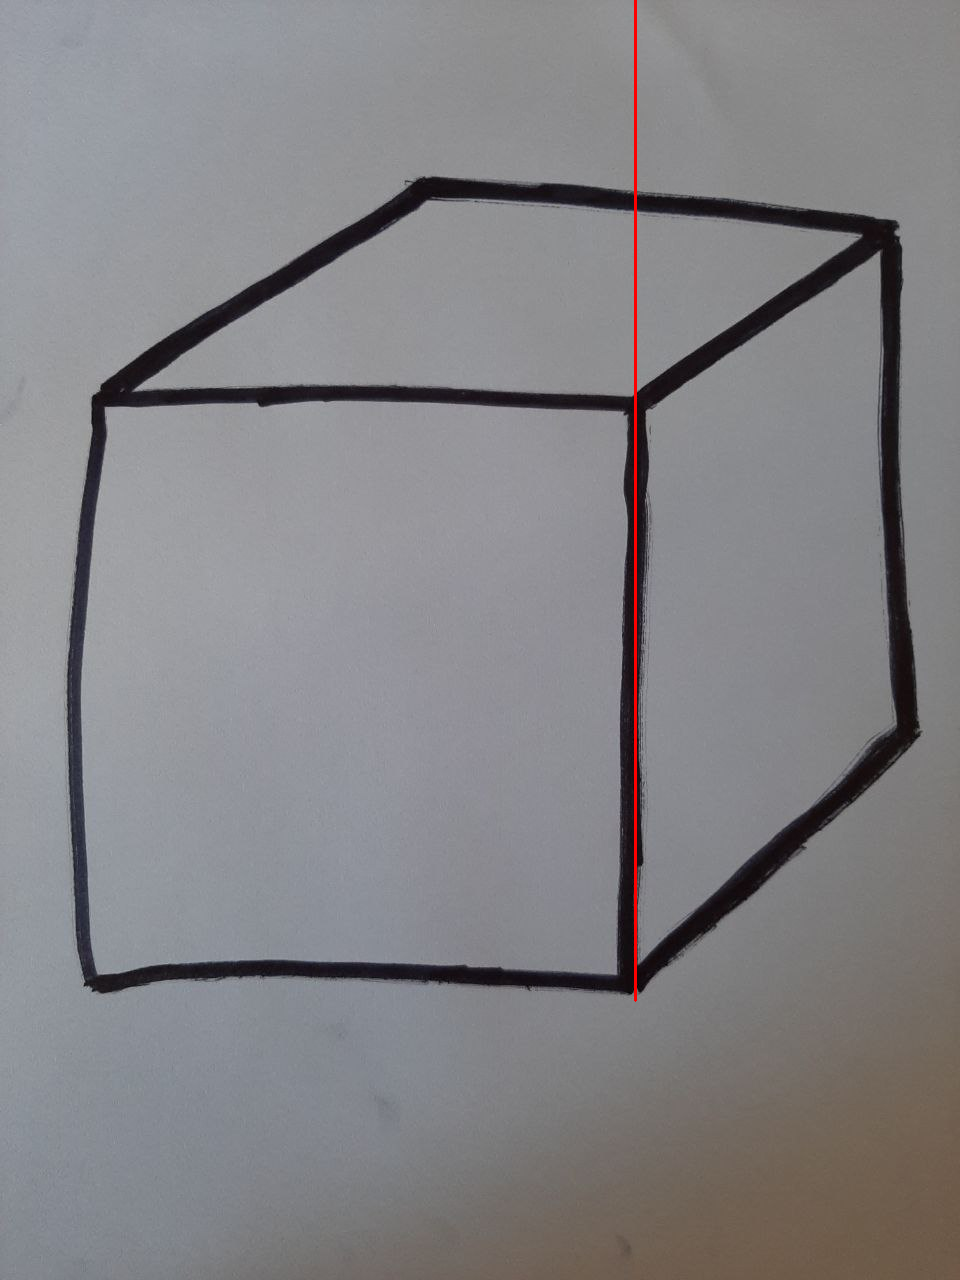

In [83]:
orig = image.copy()
lines = cv.HoughLines(edged, 10, np.pi / 180, 150, None, 0, 0)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(orig,(x1,y1),(x2,y2),(0,0,255),2)

cv2_imshow(orig)

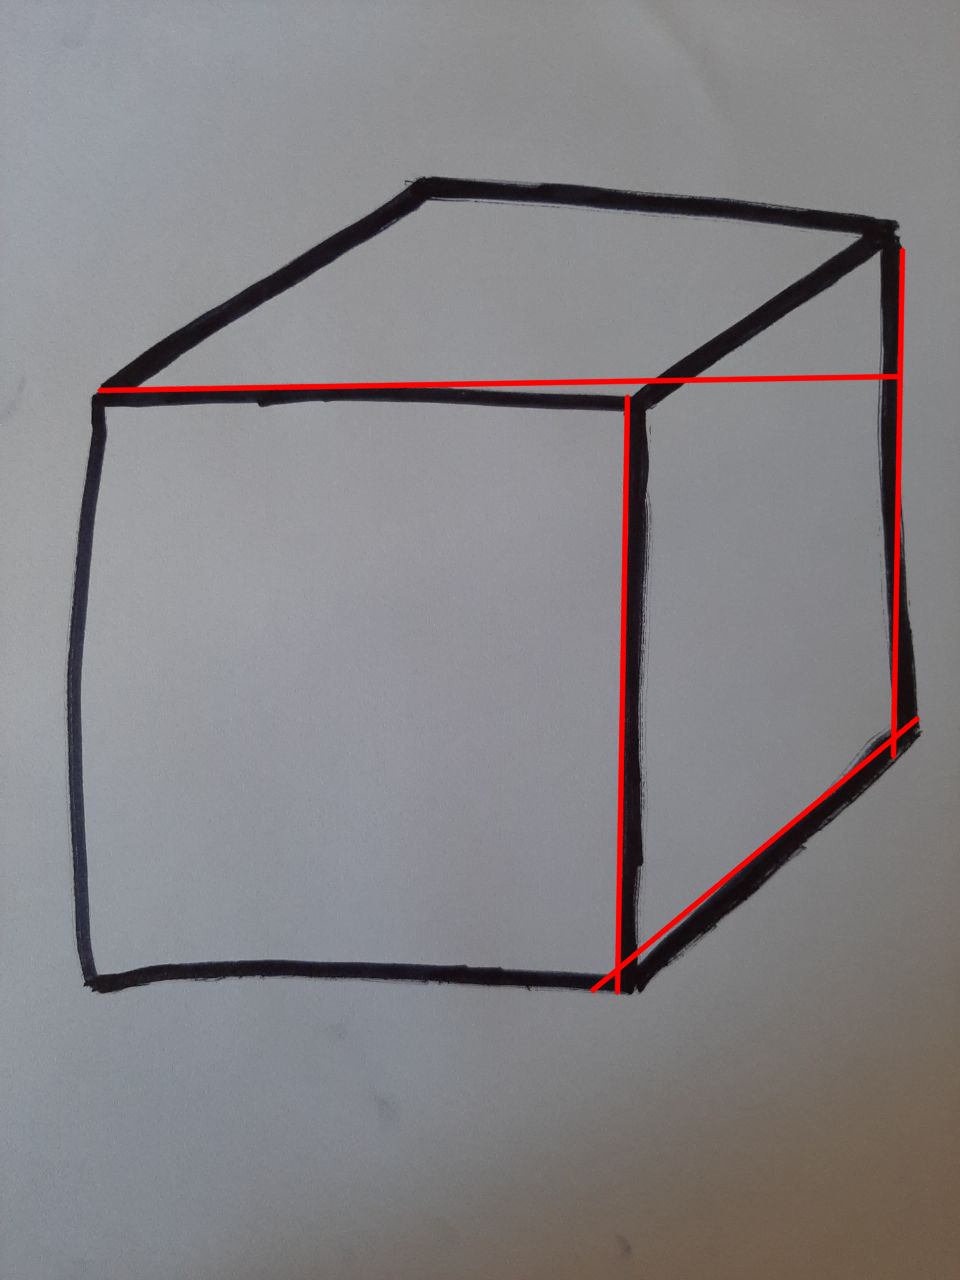

In [107]:
orig2 = image.copy()
linesP = cv.HoughLinesP(edged, 1, np.pi/180, 100, None, 300, 1000)
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(orig2, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

cv2_imshow(orig2)

In [11]:
!pip install pyRT

     |████████████████████████████████| 40 kB 3.2 MB/s 


In [52]:
from pyrt.math import Vec3
from pyrt.scene import Scene
from pyrt.light import PointLight
from pyrt.geometry import Triangle, Sphere, Vertex
from pyrt.material import PhongMaterial
from pyrt.camera import PerspectiveCamera
from pyrt.renderer import SimpleRT
from PIL import Image

# Specify width/height 
width = 640
height = 480

# now create a camera and a view :
camera = PerspectiveCamera(width, height, 30)
camera.setView(Vec3(7.5,-8.,10.), Vec3(0.,0.,0.), Vec3(0.,0.,1.))

# Create a scene
scene = Scene()

# Add a light to the scene
# scene.addLight(PointLight(Vec3(0,0,15)))
scene.addLight(PointLight(Vec3(10,-10, 5)))


# create some materials:
floormaterial = PhongMaterial(color=Vec3(0.5,0.5,0.5))
material1 = PhongMaterial(color=Vec3(1.,0.,0.), reflectivity=0.4)
material2 = PhongMaterial(color=Vec3(1.,1.,0.), reflectivity=0.4)
material3 = PhongMaterial(color=Vec3(1.,0.,1.), reflectivity=0.4)
material4 = PhongMaterial(color=Vec3(0.,1.,0.), reflectivity=0.4)
material5 = PhongMaterial(color=Vec3(0.,1.,1.), reflectivity=0.4)
material6 = PhongMaterial(color=Vec3(0.,0.,1.), reflectivity=0.4)

# Add "floor"

A = Vertex(position=(-5.0, -5.0, 0.0))
B = Vertex(position=( 5.0, -5.0, 0.0))
C = Vertex(position=( 5.0,  5.0, 0.0))
D = Vertex(position=(-5.0,  5.0, 0.0))

# Add "cube" Vertex
l = 2
# Vertices de baixo
V1 = Vertex(position=( l,-l, 0.1))
V2 = Vertex(position=( l, l, 0.1))
V3 = Vertex(position=(-l, l, 0.1))
V4 = Vertex(position=(-l,-l, 0.1))

#Vertices de cima
V5 = Vertex(position=( l,-l, 2.1))
V6 = Vertex(position=( l, l, 2.1))
V7 = Vertex(position=(-l, l, 2.1))
V8 = Vertex(position=(-l,-l, 2.1))

#Face frente
scene.add(Triangle(V1,V2,V5, material=material1))
scene.add(Triangle(V2,V5,V6, material=material1))

#Face esquerda
scene.add(Triangle(V2,V6,V7, material=material2))
scene.add(Triangle(V2,V3,V7, material=material2))

#Face trás
scene.add(Triangle(V3,V7,V8, material=material3))
scene.add(Triangle(V3,V4,V8, material=material3))

#Face direita
scene.add(Triangle(V4,V5,V8, material=material4))
scene.add(Triangle(V1,V4,V5, material=material4))

#Face baixo
scene.add(Triangle(V1,V2,V4, material=material5))
scene.add(Triangle(V2,V3,V4, material=material5))

#Face cima
scene.add(Triangle(V5,V6,V8, material=material6))
scene.add(Triangle(V6,V7,V8, material=material6))

scene.add(Triangle(A,B,C, material=floormaterial))
scene.add(Triangle(A,C,D, material=floormaterial))

# Now tell the scene which camera we use
scene.setCamera(camera)

# Create a raytracer using "SimpleRT"
engine = SimpleRT(shadow=True,iterations=2)

# Render the scene:
image = engine.render(scene)

# Save the resulting image using pillow
image.save("render.png")


# Creating Renderer: Simple Raytracer
# Shadow Enabled
# Iterations: 2
# RENDER STATISTICS###############################
TIME FOR RENDERING: 115.11411881446838s
NUMBER OF PRIMARY RAYS: 307200
NUMBER OF SECONDARY RAYS: 76733
NUMBER OF SHADOW RAYS: 307391
RAYS/s: 6005.553507421796
##################################################
